In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as map
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib import rcParams

#To ignore warnings.
import warnings
warnings.filterwarnings('ignore')

#Saving model
from sklearn.externals import joblib

In [ ]:
data = pd.read_csv('/content/cardio_train.csv', sep = ';', index_col = 'id')
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
print("Shape of the Data ", data.shape)

#Number of Rows in the dataset
print("Number of Rows are:",data.shape[0])

#Number of Columns/features in dataset
print("Number of Columns are:",data.shape[1])

print("Columns ", data.columns)

Shape of the Data  (70000, 12)
Number of Rows are: 70000
Number of Columns are: 12
Columns  Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
#List of Available features in dataset
print("Available Features are:",data.columns.tolist())

Available Features are: ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [ ]:
# Let's checkout which feature contains which kind of values i.e int /float /etc or what is the data type of values.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB
None


In [ ]:
#Checking for Duplicate data if Any
print(data.duplicated(keep = False).sum())
print(data.duplicated().sum())
print(data.loc[data.duplicated(keep = False), :])
data = data.drop_duplicates(keep='first')
print(data.shape)

48
24
         age  gender  height  weight  ap_hi  ...  gluc  smoke  alco  active  cardio
id                                           ...                                   
1585   17493       2     169    74.0    120  ...     1      0     0       1       1
1685   16793       1     165    68.0    120  ...     1      0     0       1       0
2223   21945       1     165    60.0    120  ...     1      0     0       1       0
2283   20293       1     162    70.0    110  ...     1      0     0       1       0
3247   20495       1     165    70.0    120  ...     1      0     0       1       0
3774   22077       1     175    69.0    120  ...     1      0     0       1       1
9004   14552       1     158    64.0    120  ...     1      0     0       1       0
11684  21778       1     160    58.0    120  ...     1      0     0       1       0
14974  16937       2     170    70.0    120  ...     1      0     0       0       0
15094  20495       1     165    70.0    120  ...     1      0     0   

In [ ]:
#Handle Missing Values if any
print(data.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [ ]:
#Let's check our class is balanced or not
print(data["cardio"].value_counts())
# since their are 35021 values of class 0 and 34979 values of class 1.
#so the class is balanced

0    35004
1    34972
Name: cardio, dtype: int64


In [ ]:
#Checking number of unique values available in each column
data.nunique()

age            8076
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

In [ ]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


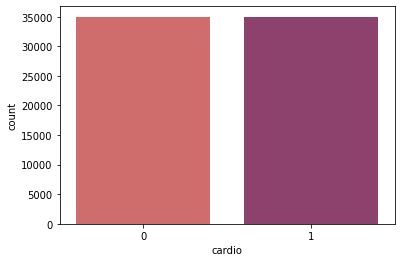

In [ ]:
#Visualization of balanced class
sns.countplot(data['cardio'],palette="flare")
#From the plot it is obtained that classs is approximately balanced

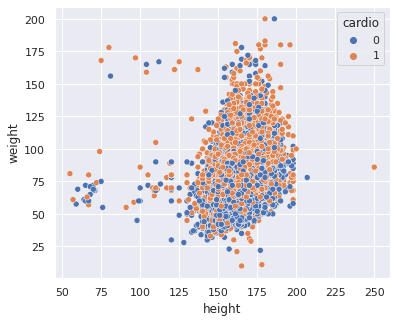

In [ ]:
#Visualizing the cvd with respect to height and weight
sns.set(rc={'figure.figsize':(6,5)})
sns.scatterplot(x= 'height', y= 'weight', hue= 'cardio', data= data)

### **Removing Outliers**

In [ ]:
#Weight
Q1 = data.weight.quantile(0.005)
Q2 = data.weight.quantile(0.9998)
Q1,Q2
data = data[(data.weight > Q1) & (data.weight < Q2)]

In [ ]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000
mean,19471.075901,1.351204,164.424530,74.383138,128.885286,96.694009,1.367367,1.226955,0.088441,0.053913,0.803503,0.501064
std,2465.413066,0.477350,8.160387,14.135167,154.461617,188.886264,0.680817,0.572839,0.283937,0.225848,0.397351,0.500002
min,10798.000000,1.000000,55.000000,45.800000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17670.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,171.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#ap-lo
Q1 = data.ap_lo.quantile(0.001)
Q2 = data.ap_lo.quantile(0.984)
Q1,Q2
data = data[(data.ap_lo > Q1) & (data.ap_lo < Q2)]

In [ ]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68207.000000,68207.000000,68207.000000,68207.000000,68207.000000,68207.000000,68207.000000,68207.000000,68207.000000,68207.000000,68207.000000,68207.000000
mean,19464.751726,1.350037,164.428475,74.256668,128.383905,81.227777,1.363672,1.225563,0.088070,0.053352,0.803026,0.495037
std,2467.266945,0.476985,8.139700,14.034714,155.749997,9.110970,0.678291,0.571523,0.283399,0.224737,0.397715,0.499979
min,10798.000000,1.000000,55.000000,45.800000,-150.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17659.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,171.000000,16020.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#ap-hi
Q1 = data.ap_hi.quantile(0.007)
Q2 = data.ap_hi.quantile(0.999)
Q1,Q2
data = data[(data.ap_hi > Q1) & (data.ap_hi < Q2)]

In [ ]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66928.000000,66928.000000,66928.000000,66928.000000,66928.000000,66928.000000,66928.000000,66928.000000,66928.000000,66928.000000,66928.000000,66928.000000
mean,19484.865408,1.352364,164.481084,74.383634,127.007919,81.479127,1.365557,1.226258,0.088259,0.053460,0.803281,0.499402
std,2462.557598,0.477710,8.123303,14.008043,15.588329,8.804921,0.680365,0.572748,0.283673,0.224951,0.397521,0.500003
min,10798.000000,1.000000,55.000000,45.800000,93.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17700.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19712.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21338.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,171.000000,197.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#height
Q1 = data.height.quantile(0.0012)
Q2 = data.height.quantile(0.99999)
Q1,Q2
data = data[(data.height > Q1) & (data.height < Q2)]

In [ ]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66846.000000,66846.000000,66846.000000,66846.000000,66846.000000,66846.000000,66846.000000,66846.000000,66846.000000,66846.000000,66846.000000,66846.000000
mean,19485.310221,1.352302,164.554005,74.375434,127.011953,81.481136,1.365736,1.226356,0.088278,0.053496,0.803369,0.499432
std,2462.416330,0.477691,7.798464,13.986297,15.590607,8.805235,0.680477,0.572854,0.283700,0.225022,0.397454,0.500003
min,10798.000000,1.000000,130.000000,45.800000,93.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17701.250000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19712.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21338.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,207.000000,171.000000,197.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data = data[data['ap_hi'] > data['ap_lo']]

In [ ]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000
mean,19485.295543,1.352288,164.553641,74.374150,127.013240,81.480305,1.365753,1.226366,0.088281,0.053484,0.803390,0.499424
std,2462.385577,0.477687,7.798286,13.984946,15.589765,8.804559,0.680488,0.572865,0.283706,0.224997,0.397438,0.500003
min,10798.000000,1.000000,130.000000,45.800000,93.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17701.500000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19712.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21338.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,207.000000,171.000000,197.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data['age'] = data['age'].div(365.24)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.358668,2,168,62.0,110,80,1,1,0,0,1,0
1,55.382762,1,156,85.0,140,90,3,1,0,0,1,1
2,51.629066,1,165,64.0,130,70,3,1,0,0,0,1
3,48.250465,2,169,82.0,150,100,1,1,0,0,1,1
4,47.842515,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.677691,2,168,76.0,120,80,1,1,1,0,1,0
99995,61.879860,1,158,126.0,140,90,2,2,0,0,1,1
99996,52.201292,2,183,105.0,180,90,3,1,0,1,0,1


In [ ]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.029045,-0.093906,0.050132,0.203161,0.147336,0.154098,0.098498,-0.050549,-0.029926,-0.010508,0.235964
gender,-0.029045,1.000000,0.520233,0.149568,0.049133,0.055871,-0.039201,-0.022988,0.337486,0.170317,0.005892,0.001100
height,-0.093906,0.520233,1.000000,0.296608,-0.002164,0.017934,-0.059698,-0.023952,0.195844,0.098249,-0.009833,-0.021556
weight,0.050132,0.149568,0.296608,1.000000,0.254370,0.236060,0.140442,0.106319,0.066255,0.066030,-0.017483,0.171705
ap_hi,0.203161,0.049133,-0.002164,0.254370,1.000000,0.704777,0.195564,0.092030,0.024499,0.032034,-0.001652,0.428734
ap_lo,0.147336,0.055871,0.017934,0.236060,0.704777,1.000000,0.160113,0.071120,0.022009,0.034006,-0.001825,0.335218
cholesterol,0.154098,-0.039201,-0.059698,0.140442,0.195564,0.160113,1.000000,0.451044,0.009198,0.033265,0.009001,0.219590
gluc,0.098498,-0.022988,-0.023952,0.106319,0.092030,0.071120,0.451044,1.000000,-0.006332,0.009023,-0.007957,0.087080
smoke,-0.050549,0.337486,0.195844,0.066255,0.024499,0.022009,0.009198,-0.006332,1.000000,0.340868,0.025103,-0.017623
alco,-0.029926,0.170317,0.098249,0.066030,0.032034,0.034006,0.033265,0.009023,0.340868,1.000000,0.024574,-0.010298


### **Visualisations**

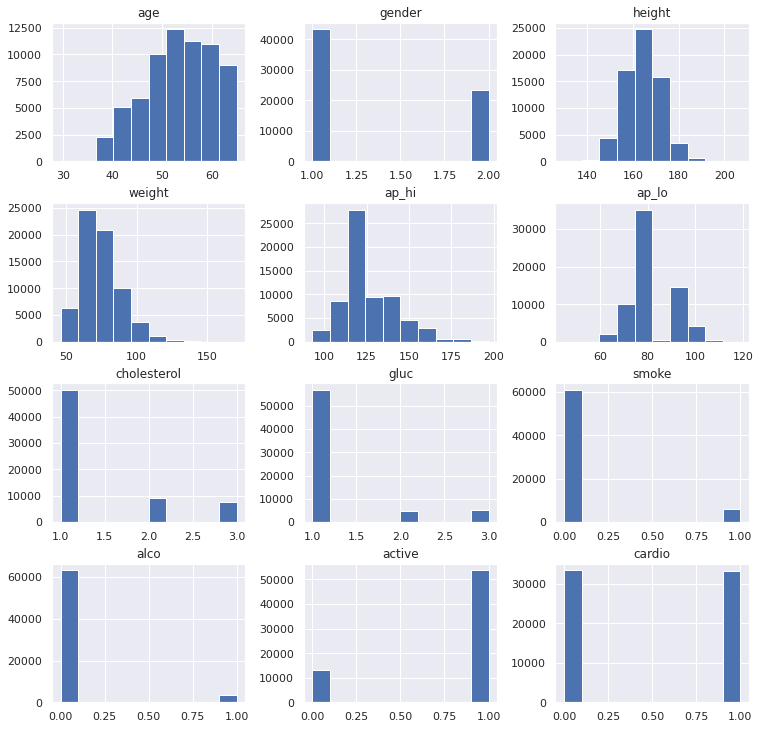

In [ ]:
# let see visual representations of the data to understand more about features.
data.hist( figsize=(12.5,12.5));

**With Respect to Gender**

Text(0.5, 1.0, ' Count of CVD & NON CVD  with respect to Gender')

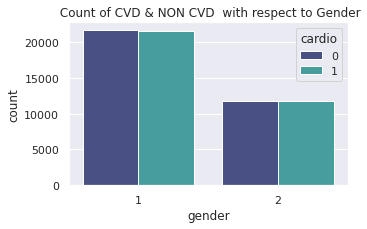

In [ ]:
#Visualizing the possibilty of CVD with respect to age
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(x= 'gender', hue= 'cardio', data= data, palette= 'mako')
plt.title(" Count of CVD & NON CVD  with respect to Gender")

**Combined Analysis of Few Features**

In [ ]:
df_new2=data.copy()
df_new2["gender"].replace({1: "Female", 2: "Male"}, inplace=True)
df_new2["cholesterol"].replace({1: "Normal", 2: "Above_Normal",3:"High"}, inplace=True)
df_new2["gluc"].replace({1: "Normal", 2: "Above_Normal",3:"High"}, inplace=True)
df_new2["smoke"].replace({0: "Non Smoker", 1: "Smoker"}, inplace=True)
df_new2["alco"].replace({0: "Not Ajjlcoholic", 1: "Alcoholic"}, inplace=True)
df_new2["active"].replace({0: "Not doing Physical Activities", 1: "Doing physical Activities"}, inplace=True)

In [ ]:
#Distribution of CVD with various values
fig = make_subplots(rows=2, cols=3,subplot_titles=("Alcohol Distribution", "Gender Distribution","Cholesterol Distribution", "Glucose Distribution", "Smoking Distribution", "Fitness Distribution"), specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df_new2[df_new2['cardio'] == 1]['alco'].value_counts().index.to_list(),values=df_new2[df_new2['cardio'] == 1]['alco'].value_counts().values), 1, 1)
fig.add_trace(go.Pie(labels=df_new2[df_new2['cardio'] == 1]['gender'].value_counts().index.to_list(),values=df_new2[df_new2['cardio'] == 1]['gender'].value_counts().values), 1, 2)

fig.add_trace(go.Pie(labels=df_new2[df_new2['cardio'] == 1]['cholesterol'].value_counts().index.to_list(),values=df_new2[df_new2['cardio'] == 1]['cholesterol'].value_counts().values), 1, 3)
fig.add_trace(go.Pie(labels=df_new2[df_new2['cardio'] == 1]['gluc'].value_counts().index.to_list(),values=df_new2[df_new2['cardio'] == 1]['gluc'].value_counts().values), 2, 1)

fig.add_trace(go.Pie(labels=df_new2[df_new2['cardio'] == 1]['smoke'].value_counts().index.to_list(),values=df_new2[df_new2['cardio'] == 1]['smoke'].value_counts().values), 2, 2)
fig.add_trace(go.Pie(labels=df_new2[df_new2['cardio'] == 1]['active'].value_counts().index.to_list(),values=df_new2[df_new2['cardio'] == 1]['active'].value_counts().values), 2, 3)


fig.update_traces(textposition='inside')
fig.update_layout(title_text="Distribution of Various Values having CVD")

ValueError: ignored

In [ ]:
#Distribution of NON CVD with various values
fig = make_subplots(rows=2, cols=3,subplot_titles=("Alcohol Distribution", "Gender Distribution","Cholesterol Distribution", "Glucose Distribution", "Smoking Distribution", "Fitness Distribution"), specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df_new2[df_new2['cardio'] == 0]['alco'].value_counts().index.to_list(),values=df_new2[df_new2['cardio'] == 0]['alco'].value_counts().values), 1, 1)
fig.add_trace(go.Pie(labels=df_new2[df_new2['cardio'] == 0]['gender'].value_counts().index.to_list(),values=df_new2[df_new2['cardio'] == 0]['gender'].value_counts().values), 1, 2)

fig.add_trace(go.Pie(labels=df_new2[df_new2['cardio'] == 0]['cholesterol'].value_counts().index.to_list(),values=df_new2[df_new2['cardio'] == 0]['cholesterol'].value_counts().values), 1, 3)
fig.add_trace(go.Pie(labels=df_new2[df_new2['cardio'] == 0]['gluc'].value_counts().index.to_list(),values=df_new2[df_new2['cardio'] == 0]['gluc'].value_counts().values), 2, 1)

fig.add_trace(go.Pie(labels=df_new2[df_new2['cardio'] == 0]['smoke'].value_counts().index.to_list(),values=df_new2[df_new2['cardio'] == 0]['smoke'].value_counts().values), 2, 2)
fig.add_trace(go.Pie(labels=df_new2[df_new2['cardio'] == 0]['active'].value_counts().index.to_list(),values=df_new2[df_new2['cardio'] == 0]['active'].value_counts().values), 2, 3)


fig.update_traces(textposition='inside')
fig.update_layout(title_text="Distribution of Various Values Not having CVD")

**Basis of Age**

In [ ]:
# sns.set_theme(style="darkgrid")
# #Visualizing the CVD with respect to age.
# sns.set(rc={'figure.figsize':(9,7)})
# sns.countplot(x='age', hue='cardio', data = data)
#It is obtained that people with age 56 or more are vulnerable towards cardiovascular disease

In [ ]:
print('Statistics of Men Diagnosed with Heart Disease:')
print('The min age for men diagnosed with heart disease is: %s years'%data[(data['cardio']==1) & (data['gender']==1)]['age'].min())
print('The max age for men diagnosed with heart disease is: %s years'%data[(data['cardio']==1) & (data['gender']==1)]['age'].max())
print('The average age for men diagnosed with heart disease is: %s years'%data[(data['cardio']==1) & (data['gender']==1)]['age'].mean())
print('\n')

print('Statistics of Women Diagnosed with Heart Disease:')
print( 'The min age for wonmen diagnosed with heart disease is: %s years'%data[(data['cardio']==1) & (data['gender']==2)]['age'].min())
print( 'The max age for women diagnosed with heart disease is: %s years'%data[(data['cardio']==1) & (data['gender']==2)]['age'].max())
print( 'The average age for women diagnosed with heart disease is: %s years'%data[(data['cardio']==1) & (data['gender']==2)]['age'].mean())

Statistics of Men Diagnosed with Heart Disease:
The min age for men diagnosed with heart disease is: 39.083890044901985 years
The max age for men diagnosed with heart disease is: 64.89157814040082 years
The average age for men diagnosed with heart disease is: 55.157087365062964 years


Statistics of Women Diagnosed with Heart Disease:
The min age for wonmen diagnosed with heart disease is: 39.08936589639689 years
The max age for women diagnosed with heart disease is: 64.92443324937028 years
The average age for women diagnosed with heart disease is: 54.54728832467926 years


**Basis of Height and Weight**

In [ ]:
print('Height of women in centimeter ')
data_women=data[data['gender'] == 1]
print(data_women['height'].describe())

print('\n*****************************************************************************\n')
print('Height of men in centimeter')
data_men=data[data['gender'] == 2]
print(data_men['height'].describe())


Height of women in centimeter 
count    43295.000000
mean       161.561705
std          6.629754
min        130.000000
25%        157.000000
50%        162.000000
75%        166.000000
max        198.000000
Name: height, dtype: float64

*****************************************************************************

Height of men in centimeter
count    23548.000000
mean       170.054569
std          6.715183
min        130.000000
25%        166.000000
50%        170.000000
75%        175.000000
max        207.000000
Name: height, dtype: float64


In [ ]:
print('Weight of women in kg ')
data_women=data[data['gender'] == 1]
print(data_women['weight'].describe())

print('\n*****************************************************************************\n')
print('Weight of men in kg')
data_men=data[data['gender'] == 2]
print(data_men['weight'].describe())
#min weight is 10 kg, and max is 200 kg -cleaning required

Weight of women in kg 
count    43295.000000
mean        72.831551
std         13.811055
min         45.800000
25%         63.000000
50%         70.000000
75%         80.000000
max        170.000000
Name: weight, dtype: float64

*****************************************************************************

Weight of men in kg
count    23548.000000
mean        77.210349
std         13.858364
min         46.000000
25%         68.000000
50%         75.000000
75%         85.000000
max        171.000000
Name: weight, dtype: float64


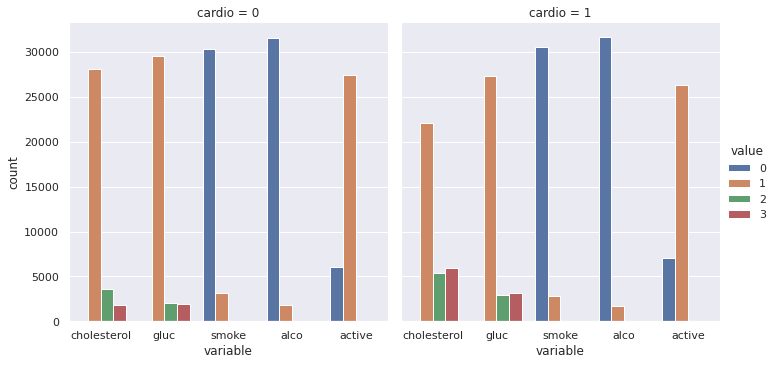

In [ ]:
#visualizing categorical values with respect to target class
data_long = pd.melt(data, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=data_long, kind="count");

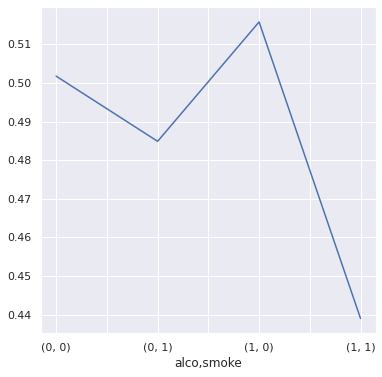

In [ ]:
#Visulalizing the risk of CVD in people who drink and smoke
fig= plt.figure(figsize= (6,6))
data.groupby(['alco', 'smoke'])['cardio'].mean().plot()

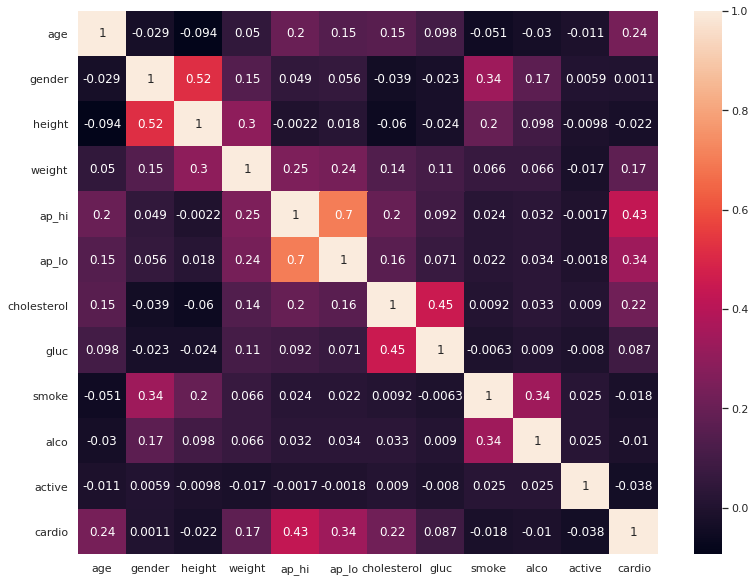

In [ ]:
plt.subplots(figsize=(13,10))

#Visulazing the correlation between all the features
#sns.heatmap(df.corr(method='pearson'), annot = True)
sns.heatmap(data.corr(), annot = True)

In [ ]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000
mean,53.349292,1.352288,164.553641,74.374150,127.013240,81.480305,1.365753,1.226366,0.088281,0.053484,0.803390,0.499424
std,6.741829,0.477687,7.798286,13.984946,15.589765,8.804559,0.680488,0.572865,0.283706,0.224997,0.397438,0.500003
min,29.564122,1.000000,130.000000,45.800000,93.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.465393,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.969992,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.421860,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.924433,2.000000,207.000000,171.000000,197.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
temp = pd.get_dummies(data['gender'])
temp = temp.rename(columns={1: 'women', 2: 'men'})
data = data.drop('gender', axis = 1)
data = data.join(temp)

data['bmi'] = data['weight']/ ((data['height']/100)**2)
data = data.drop('weight', axis = 1)
data = data.drop('height', axis = 1)

In [ ]:
Q1 = data.bmi.quantile(0)
Q2 = data.bmi.quantile(0.999)
data = data[(data.bmi > Q1) & (data.bmi < Q2)]

In [ ]:
data.describe()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,women,men,bmi
count,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000
mean,53.348562,127.003085,81.474324,1.365586,1.226133,0.088341,0.053478,0.803385,0.499259,0.647518,0.352482,27.480317
std,6.741609,15.583784,8.802815,0.680386,0.572602,0.283793,0.224987,0.397442,0.500003,0.477747,0.477747,5.044507
min,29.564122,93.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.609204
25%,48.464024,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,23.875115
50%,53.969992,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,26.397977
75%,58.421860,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,30.119376
max,64.924433,197.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,53.150759


In [ ]:
data['BMI'] = data['weight']/((data['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=data, color = "orange",palette = 'Accent', kind="box", height=10, aspect=.7);

KeyError: ignored

# **Modelling**

In [ ]:
!pip3 install catboost
from sklearn.metrics import plot_roc_curve, roc_curve, classification_report, accuracy_score
from sklearn.metrics import matthews_corrcoef, f1_score, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

     |████████████████████████████████| 67.3MB 70kB/s 


In [ ]:
X = data
X = X.drop('cardio', axis = 1)
y = data['cardio'].values
originalX = X
originaly = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46742, 11), (20033, 11), (46742,), (20033,))

In [ ]:
def print_results(y_test, clf):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    temp = classification_report(y_test, y_pred, output_dict= True)
    precision = temp['0']['precision']
    sensitivity = temp['1']['recall']
    specificity = temp['0']['recall']
    f1 = f1_score(y_test, y_pred)
    probas = clf.predict_proba(X_test)[:,1]
    fpr , tpr, thresholds = roc_curve(y_test, probas)
    aucscore = auc(fpr, tpr)
    mcc = matthews_corrcoef(y_test, y_pred)

    print("Accuracy: \t", round(accuracy,6))
    print("Precision: \t", round(precision,6))
    print("Sensitivity: \t", round(sensitivity,6))
    print("Specificity: \t", round(specificity,6))
    print("F-Score: \t", round(f1,6))
    print("AUC: \t\t", round(aucscore,6))
    print("MCC: \t\t", round(mcc,6))
    return (fpr , tpr, thresholds)

**Logistic Regression**

In [ ]:
clf = LogisticRegression(random_state = 42, max_iter = 500)
clf.fit(X_train, y_train)

fpr1 , tpr1, thresholds1 = print_results(y_test, clf)

Accuracy: 	 0.723955
Precision: 	 0.693196
Sensitivity: 	 0.659805
Specificity: 	 0.789879
F-Score: 	 0.70784
AUC: 		 0.792432
MCC: 		 0.453136


**K Neighbours**

In [ ]:
parameters = { 'n_neighbors':[i for i in range(1,100)]}
DT_optimised = KNeighborsClassifier()
clf_grid = GridSearchCV(DT_optimised, parameters, cv = 5)
clf_grid.fit(X_train2, y_train2)
clf_grid.best_params_

{'n_neighbors': 96}

In [ ]:
clf_grid.best_params_

{'n_neighbors': 96}

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 96)
clf.fit(X_train, y_train)

fpr2 , tpr2, thresholds2 = print_results(y_test, clf)

Accuracy: 	 0.725303
Precision: 	 0.695629
Sensitivity: 	 0.664631
Specificity: 	 0.787652
F-Score: 	 0.710353
AUC: 		 0.793272
MCC: 		 0.455361


**Gaussian NB**

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

fpr3 , tpr3, thresholds3 = print_results(y_test, clf)

Accuracy: 	 0.71542
Precision: 	 0.674198
Sensitivity: 	 0.615089
Specificity: 	 0.818522
F-Score: 	 0.686603
AUC: 		 0.786301
MCC: 		 0.442285


**Decision Tree Classifier**

In [ ]:
clf = DecisionTreeClassifier(max_depth = 6, criterion = 'gini', random_state = 42)
clf.fit(X_train, y_train)

fpr4 , tpr4, thresholds4 = print_results(y_test, clf)

Accuracy: 	 0.72705
Precision: 	 0.69529
Sensitivity: 	 0.660987
Specificity: 	 0.794939
F-Score: 	 0.710535
AUC: 		 0.794339
MCC: 		 0.459649


**DT Optimised**

In [ ]:
parameters = {'criterion':('entropy', 'gini'), 'max_depth':[i for i in range(1,51)]}
DT_optimised = DecisionTreeClassifier()
clf_DT = GridSearchCV(DT_optimised, parameters, cv = 5)
clf_DT.fit(X_train, y_train)
clf_DT.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [ ]:
clf = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy', random_state = 42)
clf.fit(X_train, y_train)

fpr5 , tpr5, thresholds5 = print_results(y_test, clf)

Accuracy: 	 0.726951
Precision: 	 0.692476
Sensitivity: 	 0.653009
Specificity: 	 0.802935
F-Score: 	 0.707955
AUC: 		 0.792551
MCC: 		 0.460684


**Gradient Boosting**

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=42)
clf.fit(X_train, y_train)

fpr6 , tpr6, thresholds6 = print_results(y_test, clf)

Accuracy: 	 0.729546
Precision: 	 0.707034
Sensitivity: 	 0.689057
Specificity: 	 0.771154
F-Score: 	 0.720866
AUC: 		 0.795734
MCC: 		 0.461497


**Random Forest**

In [ ]:
parameters = {'max_depth':[i for i in range(1,51)]}
RT_optimised =  RandomForestClassifier()
clf_RT = GridSearchCV(RT_optimised, parameters, cv = 5)
clf_RT.fit(X_train, y_train)
clf_RT.best_params_

In [ ]:
clf = RandomForestClassifier(max_depth = 12, random_state=42)
clf.fit(X_train, y_train)

fpr7 , tpr7, thresholds7 = print_results(y_test, clf)

Accuracy: 	 0.731942
Precision: 	 0.705299
Sensitivity: 	 0.681178
Specificity: 	 0.784109
F-Score: 	 0.720342
AUC: 		 0.799058
MCC: 		 0.46743


**SVC**

In [ ]:
clf = SVC(random_state = 42, probability = True)
clf.fit(X_train, y_train)

fpr8 , tpr8, thresholds8 = print_results(y_test, clf)

**XGB Classifier**

In [ ]:
clf = XGBClassifier(max_depth=4,booster='gbtree')
clf.fit(X_train, y_train)

fpr9 , tpr9, thresholds9 = print_results(y_test, clf)

Accuracy: 	 0.732691
Precision: 	 0.706414
Sensitivity: 	 0.683049
Specificity: 	 0.783704
F-Score: 	 0.721456
AUC: 		 0.80126
MCC: 		 0.468799


**LGBM Classifier**

In [ ]:
clf = LGBMClassifier()
clf.fit(X_train, y_train)

fpr10 , tpr10, thresholds10 = print_results(y_test, clf)

Accuracy: 	 0.732142
Precision: 	 0.706081
Sensitivity: 	 0.682951
Specificity: 	 0.782692
F-Score: 	 0.721015
AUC: 		 0.800532
MCC: 		 0.467644


**CatBoost Classifier**

In [ ]:
clf = CatBoostClassifier(max_depth=4)
clf.fit(X_train, y_train)

fpr11 , tpr11, thresholds11 = print_results(y_test, clf)

Learning rate set to 0.053198
0:	learn: 0.6789636	total: 64.3ms	remaining: 1m 4s
1:	learn: 0.6663336	total: 79.2ms	remaining: 39.5s
2:	learn: 0.6548226	total: 93.7ms	remaining: 31.1s
3:	learn: 0.6444873	total: 114ms	remaining: 28.3s
4:	learn: 0.6352061	total: 128ms	remaining: 25.5s
5:	learn: 0.6272071	total: 142ms	remaining: 23.5s
6:	learn: 0.6199309	total: 156ms	remaining: 22.1s
7:	learn: 0.6142879	total: 171ms	remaining: 21.2s
8:	learn: 0.6084699	total: 185ms	remaining: 20.4s
9:	learn: 0.6031925	total: 203ms	remaining: 20.1s
10:	learn: 0.5989693	total: 218ms	remaining: 19.6s
11:	learn: 0.5946253	total: 232ms	remaining: 19.1s
12:	learn: 0.5910827	total: 248ms	remaining: 18.8s
13:	learn: 0.5876898	total: 262ms	remaining: 18.4s
14:	learn: 0.5845271	total: 276ms	remaining: 18.1s
15:	learn: 0.5817431	total: 293ms	remaining: 18s
16:	learn: 0.5794285	total: 307ms	remaining: 17.7s
17:	learn: 0.5770622	total: 321ms	remaining: 17.5s
18:	learn: 0.5750949	total: 338ms	remaining: 17.4s
19:	learn:

**Deep Learning**

In [ ]:
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape = (11,) ))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = .15)
# results = model.evaluate(X_test, y_test, batch_size=32)
# y_pred = model.predict_classes(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# temp = classification_report(y_test, y_pred, output_dict= True)
# precision = temp['0']['precision']
# sensitivity = temp['1']['recall']
# specificity = temp['0']['recall']
# f1 = f1_score(y_test, y_pred)
# probas = clf.predict_proba(X_test)[:,1]
# fpr12 , tpr12, thresholds12 = roc_curve(y_test, probas)
# aucscore = auc(fpr12, tpr12)
# mcc = matthews_corrcoef(y_test, y_pred)

# print("Accuracy: \t", round(accuracy,6))
# print("Precision: \t", round(precision,6))
# print("Sensitivity: \t", round(sensitivity,6))
# print("Specificity: \t", round(specificity,6))
# print("F-Score: \t", round(f1,6))
# print("AUC: \t\t", round(aucscore,6))
# print("MCC: \t\t", round(mcc,6))

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6, input_dim=5, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.002)
model.compile(loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()], optimizer=optimizer)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='val_loss',    # Quantity to be monitored.
    factor=0.1,       # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=50,        # The number of epochs with no improvement after which learning rate will be reduced.
    verbose=1,         # 0: quiet - 1: update messages.
    mode="auto",       # {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; 
                       # in the max mode it will be reduced when the quantity monitored has stopped increasing; 
                       # in auto mode, the direction is automatically inferred from the name of the monitored quantity.
    min_delta=0.0001,  # threshold for measuring the new optimum, to only focus on significant changes.
    cooldown=0,        # number of epochs to wait before resuming normal operation after learning rate (lr) has been reduced.
    min_lr=0.00001     # lower bound on the learning rate.
    )

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=400, restore_best_weights=True)
history = model.fit(x=X_train, y=y_train,
                    batch_size=1024, epochs=1500,
                    verbose=0,validation_data=(X_test,y_test),
                    callbacks=[learning_rate_reduction, es],
                    shuffle=True)


Epoch 01022: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 01259: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.

Epoch 01309: ReduceLROnPlateau reducing learning rate to 1e-05.


627/627 - 1s - loss: 0.5552 - accuracy: 0.7275 - auc_1: 0.7938


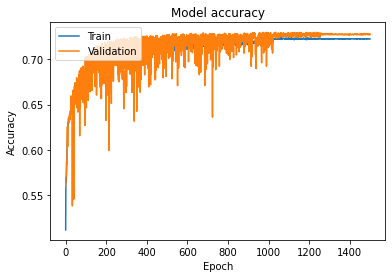

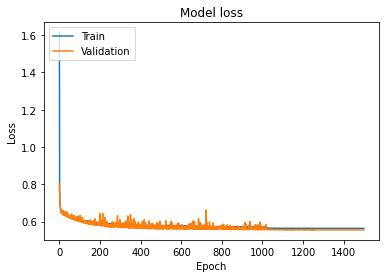

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
#plt.xscale("log")
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)
y_pred = []
for i in range(len(pred)):
    if pred[i] >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
accuracy = accuracy_score(y_test, y_pred)
temp = classification_report(y_test, y_pred, output_dict= True)
precision = temp['0']['precision']
sensitivity = temp['1']['recall']
specificity = temp['0']['recall']
f1 = f1_score(y_test, y_pred)
probas = model.predict_proba(X_test)#[:,1]
fpr15 , tpr15, thresholds15 = roc_curve(y_test, probas)
#aucscore = tf.metrics.AUC(y_test, y_pred)[1]
#print(aucscore)
mcc = matthews_corrcoef(y_test, y_pred)
print("Accuracy: \t", round(accuracy,6))
print("Precision: \t", round(precision,6))
print("Sensitivity: \t", round(sensitivity,6))
print("Specificity: \t", round(specificity,6))
print("F-Score: \t", round(f1,6))
print("AUC: \t\t", (round(sensitivity,6) + round(specificity,6))/2)
print("MCC: \t\t", round(mcc,6))

Accuracy: 	 0.72755
Precision: 	 0.699261
Sensitivity: 	 0.671329
Specificity: 	 0.785324
F-Score: 	 0.714091
AUC: 		 0.7283265
MCC: 		 0.459285


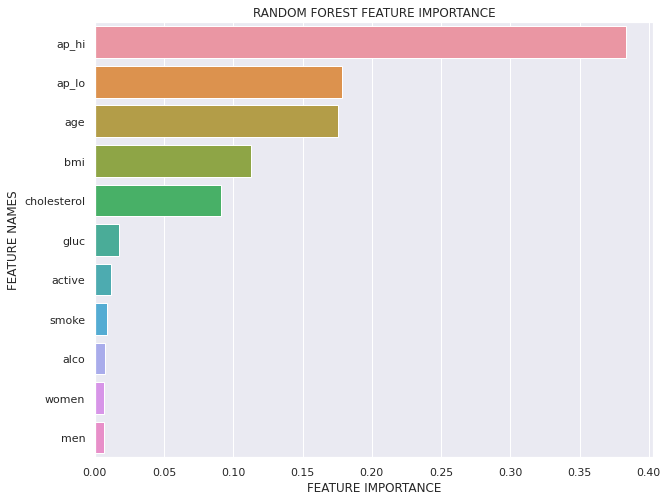

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(clf.feature_importances_,X_train.columns,'RANDOM FOREST ')

In [ ]:
X2 = data
X2 = X2.drop('cardio', axis = 1)
X2 = X2.drop('women', axis = 1)
X2 = X2.drop('men', axis = 1)
X2 = X2.drop('gluc', axis = 1)
X2 = X2.drop('active', axis = 1)
X2 = X2.drop('smoke', axis = 1)
X2 = X2.drop('alco', axis = 1)
y2 = data['cardio'].values

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train

,age,ap_hi,ap_lo,cholesterol,bmi
id,,,,,
94850,55.694886,120,80,1,27.734375
22710,58.375315,120,80,1,23.529412
12082,54.282116,120,90,1,26.533759
5657,42.122988,120,90,2,29.054752
20247,55.897492,160,90,3,26.142688
...,...,...,...,...,...
55619,51.968569,110,70,1,25.344353
9337,39.229000,110,70,1,29.777778
82073,57.918081,150,80,1,30.486685


#**Proposed Model**

In [ ]:
from keras.optimizers import *
from keras.initializers import *
from keras.models import *
from keras.layers import *
from keras.callbacks import EarlyStopping

In [ ]:
def create_model():
    # Hyperparameter:
    init_w = glorot_uniform(seed=0)
    loss = "binary_crossentropy"
    optimizer = Adam()
    
    # Defining the model:
    model = Sequential()

    model.add(Dense(50, kernel_initializer=init_w, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(rate=0.1))

    model.add(Dense(25, kernel_initializer=init_w))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(rate=0.1))

    model.add(Dense(12, kernel_initializer=init_w))
    model.add(LeakyReLU())

    model.add(Dense(1, kernel_initializer=init_w))
    model.add(Activation("sigmoid"))
    
    model.summary()
    
    # Training
    model.compile(
        loss=loss,
        optimizer=optimizer,
        metrics=["accuracy"])

    return model


In [ ]:
nn = create_model()
nn.fit(
    x=X_train,
    y=y_train,
    verbose=2,
    epochs=100,
    batch_size=32, validation_split = 0.15)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                600       
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
batch_normalization_1 (Batch (None, 25)                100       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 25)               

In [ ]:
results = nn.evaluate(X_test, y_test, batch_size=32)
y_pred = nn.predict_classes(X_test)

627/627 [==============================] - 1s 1ms/step - loss: 0.5417 - accuracy: 0.7335


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
temp = classification_report(y_test, y_pred, output_dict= True)
precision = temp['0']['precision']
sensitivity = temp['1']['recall']
specificity = temp['0']['recall']
f1 = f1_score(y_test, y_pred)
probas = clf.predict_proba(X_test)[:,1]
fpr13 , tpr13, thresholds13 = roc_curve(y_test, probas)
aucscore = auc(fpr13, tpr13)
mcc = matthews_corrcoef(y_test, y_pred)

print("Accuracy: \t", round(accuracy,6))
print("Precision: \t", round(precision,6))
print("Sensitivity: \t", round(sensitivity,6))
print("Specificity: \t", round(specificity,6))
print("F-Score: \t", round(f1,6))
print("AUC: \t\t", round(aucscore,6))
print("MCC: \t\t", round(mcc,6))

Accuracy: 	 0.73354
Precision: 	 0.702695
Sensitivity: 	 0.67192
Specificity: 	 0.796862
F-Score: 	 0.718786
AUC: 		 0.803935
MCC: 		 0.472068


## **PLOTTING ROC**

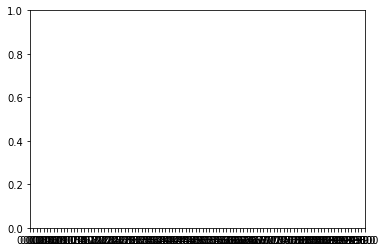

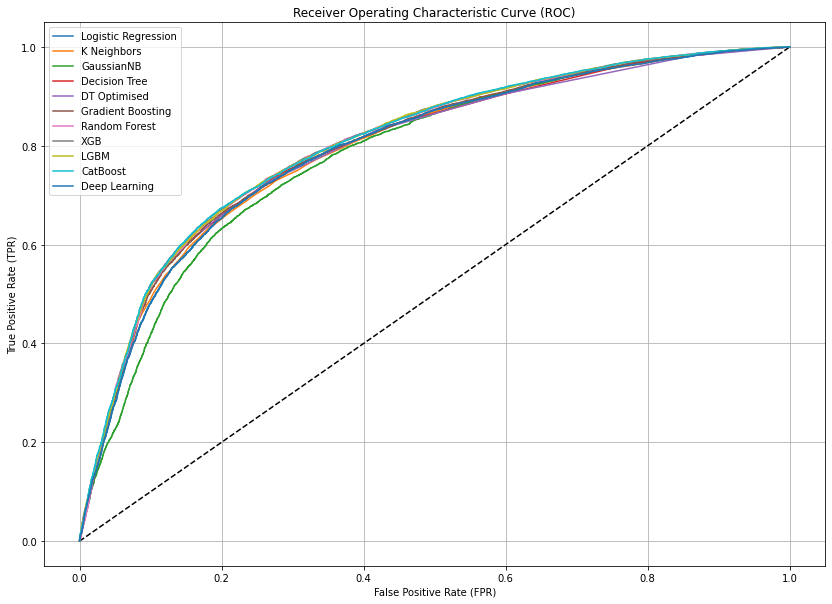

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(14,10))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "K Neighbors")
plt.plot(fpr3, tpr3, label= "GaussianNB")
plt.plot(fpr4, tpr4, label= "Decision Tree")
plt.plot(fpr5, tpr5, label= "DT Optimised")
plt.plot(fpr6, tpr6, label= "Gradient Boosting")
plt.plot(fpr7,tpr7,label="Random Forest")
# plt.plot(fpr8,tpr8,label="SVC")
plt.plot(fpr9,tpr9,label="XGB")
plt.plot(fpr10,tpr10,label="LGBM")
plt.plot(fpr11,tpr11,label="CatBoost")
plt.plot(fpr15,tpr15,label="Deep Learning")
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('Receiver Operating Characteristic Curve (ROC)')
ax.set_xticks(np.linspace(0,1,100))
plt.grid()
plt.show()